<a href="https://colab.research.google.com/github/lordoz234/ML_Homework/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание оттока пользователей

Нам предстоит научитсья моделировать отток клиентов телеком компании. Эта задача очень важна на практике и алгоритмы для ее решения используются в реальных телеком компаниях, ведь если мы знаем, что клиент собирается уйти от нас, то мы попытаться удержать его, предложив какие-то бонусы.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("train.csv")

Посмотрим на наши признаки:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Как мы видим из таблицы у нас задача *бинарной классификации*, состоящая в предсказании оттока полтзователя

#Обработка пропусков

In [ ]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропусков данный датасет не содержит, однако признак TotalSpent не числовой

In [ ]:
data.query('TotalSpent == " "')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [ ]:
data['TotalSpent'] = data['TotalSpent'].where(data['ClientPeriod'] > 0, data['MonthlySpending'])
data['ClientPeriod'] = data['ClientPeriod'].where(data['ClientPeriod'] > 0, 1)
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

#Анализ данных

Разделим наши признаки на числовые и категориальные:

In [ ]:
cat_cols = [x for x in data.columns if data[x].dtype == 'object']
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64'] and x != 'Churn']
target_col = "Churn"
print("Категориальные признаки: ", ", ".join(cat_cols))
print("Числовые признаки: ", ", ".join(num_cols))
print("Целевой признак: ", target_col)

Категориальные признаки:  Sex, HasPartner, HasChild, HasPhoneService, HasMultiplePhoneNumbers, HasInternetService, HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineTV, HasMovieSubscription, HasContractPhone, IsBillingPaperless, PaymentMethod
Числовые признаки:  ClientPeriod, MonthlySpending, TotalSpent, IsSeniorCitizen
Целевой признак:  Churn


Посмотрим на распределение целевой переменной:

([<matplotlib.patches.Wedge at 0x7fe4add47390>,
 [Text(-0.7478930722742168, 0.8066324766857789, 'False'),
  Text(0.7478930722742166, -0.8066324766857789, 'True')],
 [Text(-0.4079416757859364, 0.4399813509195157, '73.8%'),
  Text(0.4079416757859363, -0.4399813509195157, '26.2%')])

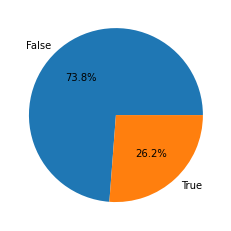

In [ ]:
plt.pie(data.Churn.value_counts(), labels = ["False", "True"], autopct='%1.1f%%')

Мы можем сделать *вывод* о несбалансированной выборке.

Посмотрим на box plot числовых призвнаков:

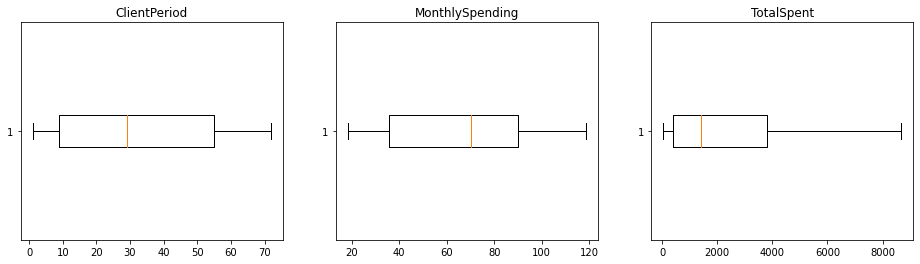

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, col in enumerate(num_cols[:3]):
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_title(col)

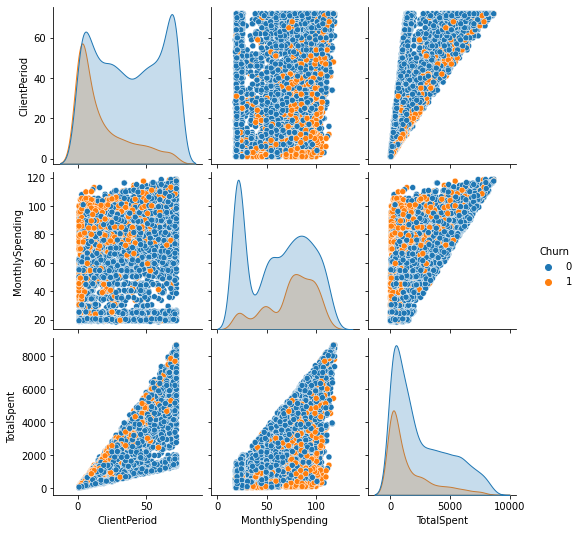

In [ ]:
import seaborn as sns
sns.pairplot(data[num_cols[:3] + [target_col]], hue=target_col);

Как видно, что в основном покидали наш сервис - новые пользователи

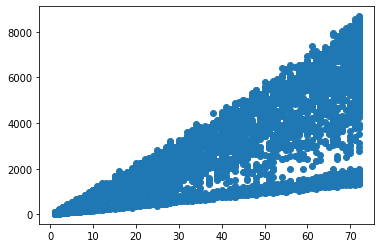

In [ ]:
plt.scatter(data['ClientPeriod'], data['TotalSpent'])

Можем сделать вывод, о том, что новые пользователи платят меньше

In [ ]:
corr_mat = data.corr()
corr_mat

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.000000,0.249393,0.826647,0.011532,-0.350713
MonthlySpending,0.249393,1.000000,0.652027,0.215456,0.184769
TotalSpent,0.826647,0.652027,1.000000,0.094628,-0.200061
IsSeniorCitizen,0.011532,0.215456,0.094628,1.000000,0.156872
Churn,-0.350713,0.184769,-0.200061,0.156872,1.000000


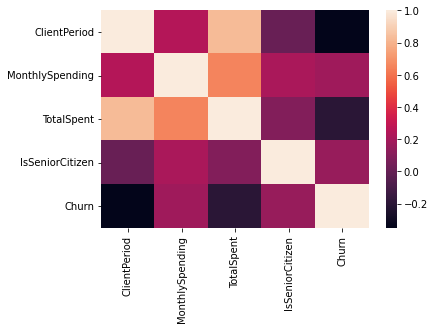

In [ ]:
sns.heatmap(corr_mat)

Как мы видим: Total Spent коррелирует с MonthlySpending и TotalSpent

Разделим данные на X и y:

In [ ]:
X = data[num_cols + cat_cols].copy()
y = data['Churn'].copy()

Посмотрим на размерность:

In [ ]:
X.shape, y.shape

((5282, 19), (5282,))

#Предоброботка данных

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

num_transform = Pipeline(steps=[
                    ('scale', MaxAbsScaler())                             
])
cat_transfrom = Pipeline(steps=[
                    ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
                    ('scale', MaxAbsScaler())
])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers = [
                                    ('cat', cat_transfrom, cat_cols),
                                    ('num', num_transform, num_cols)
])

Разделим выборку на train/test:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape, y_train.shape

((4753, 19), (4753,))

In [ ]:
X_test.shape, y_test.shape

((529, 19), (529,))

Применим oversampling для устранения несбалансированности классов:

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)

#Построение классификаторов

##Построение линейных моделей

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, ShuffleSplit, RepeatedKFold, cross_val_predict

###LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}
best_log = GridSearchCV(LogisticRegression(), parameters, scoring='roc_auc', cv = 5)
my_pipeline_log = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('sampling', smt),
                        ('model', best_log)
])

In [ ]:
my_pipeline_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True)),
                                                

In [ ]:
my_pipeline_log[2].best_score_

0.8570279059650165

In [ ]:
my_pipeline_log[2].best_params_

{'C': 100}

In [ ]:
predicted = my_pipeline_log.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.8736136614028646

###DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
depth = np.arange(10, 50)
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': depth,
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [5, 10, 20],
              'splitter': ['best', 'random']
             }
best_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_tree = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('sampling', smt),
                        ('model', best_tree)
])

In [ ]:
my_pipeline_tree.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True)),
                                                

In [ ]:
my_pipeline_tree[2].best_score_

0.8716755357658057

In [ ]:
my_pipeline_tree[2].best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 20,
 'splitter': 'best'}

In [ ]:
predicted = my_pipeline_tree.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.8736136614028646

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors':np.arange(1, 20), 
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'euclidean'],
              }
best_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_knn = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('sampling', smt),
                        ('model', best_knn)
])

In [ ]:
my_pipeline_knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True)),
                                                

In [ ]:
my_pipeline_knn[2].best_score_

0.8846838493114794

In [ ]:
my_pipeline_knn[2].best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
predicted = my_pipeline_knn.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.7829554995801847

##Применение градиентного метода

###Gradient Boosting

###GridSearch


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
parameters = {
    "learning_rate": [0.01, 0.02],
    "max_depth": range(5, 10),
    "max_features":["sqrt"],
    "criterion": ["friedman_mse"],
    "n_estimators":[400, 600],
    'min_samples_split': [20, 40],
}
best_boost = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_boost = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('smote', smt),
                        ('model', best_boost)
])

In [ ]:
my_pipeline_boost.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True)),
                                                

In [ ]:
my_pipeline_boost[2].best_score_

0.9439249412205223

In [ ]:
my_pipeline_boost[2].best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.02,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 20,
 'n_estimators': 600}

In [ ]:
predicted = my_pipeline_boost.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.8549026808666911

In [ ]:
X_test_origin = pd.read_csv('test.csv')
X_test_origin['TotalSpent'] = X_test_origin['TotalSpent'].where(X_test_origin['ClientPeriod'] > 0, X_test_origin['MonthlySpending'])
X_test_origin['ClientPeriod'] = X_test_origin['ClientPeriod'].where(X_test_origin['ClientPeriod'] > 0, 1)
X_test_origin['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
submission = pd.read_csv('submission.csv')
submission['Churn'] = my_pipeline_boost.predict_proba(X_test_origin)[:, 1]
submission.to_csv('my_submission.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


##Логистическая регрессия на PyTorch

In [ ]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.fit_transform(X_test)

In [ ]:
y_train = y_train.values
y_test = y_test.values

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils import shuffle
from torch.autograd import Variable

class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.f1 = nn.Linear(input_dim, 100)
        self.f2 = nn.Linear(100, output_dim)


    def forward(self,x):
        x = self.f1(x)
        x = F.relu(x)
        x = F.dropout(x, p = 0.2)
        x = self.f2(x)
        return  F.sigmoid(x)

In [ ]:
batch_size = 100
batch_no = len(X_train) // batch_size

In [ ]:
X_train.shape

(4753, 45)

In [ ]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for i in range(len(X)//batch_size):
        if i + batch_size >= len(X):
            continue
        ind = perm[i*batch_size : (i+1)*batch_size]
        yield (X[ind], y[ind])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0: loss 0.54158616065979, accuracy 0.7591489553451538
epoch 50: loss 0.46955570578575134, accuracy 0.8423404097557068
epoch 100: loss 0.45315974950790405, accuracy 0.8587234020233154
epoch 150: loss 0.4434613287448883, accuracy 0.8714893460273743
epoch 200: loss 0.4379478096961975, accuracy 0.8753191232681274
epoch 250: loss 0.43335944414138794, accuracy 0.8780850768089294
epoch 300: loss 0.43055856227874756, accuracy 0.8821276426315308
epoch 350: loss 0.4313192069530487, accuracy 0.8795744776725769
epoch 400: loss 0.4326314330101013, accuracy 0.8793616890907288
epoch 450: loss 0.43067502975463867, accuracy 0.8806383013725281


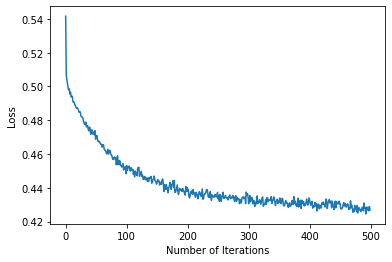

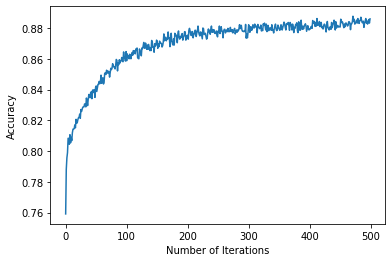

In [ ]:
input_dim = 45
output_dim = 2
learning_rate = 0.01
model = LinearRegression(input_dim,output_dim)
error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_list = []
acc_list = []
iteration_number = 500

for iteration in range(iteration_number):
    batch_loss = 0
    batch_accur = 0
    temp = 0

    for (x, y) in generate_batches(X_train, y_train, batch_size):
        inputs = Variable(torch.from_numpy(x)).float()
        labels = Variable(torch.from_numpy(y))
            
        optimizer.zero_grad() 

        results = model(inputs)
        
        loss = error(results, labels)

        batch_loss += loss.data
        
        loss.backward()
        
        optimizer.step()

        with torch.no_grad():
            _, pred = torch.max(results, 1)
            batch_accur += torch.sum(pred == labels)
            temp += len(pred)
    
    loss_list.append(batch_loss/batch_no)
    acc_list.append(batch_accur/temp)
    
    if(iteration % 50 == 0):
        print('epoch {}: loss {}, accuracy {}'.format(iteration, batch_loss/batch_no, batch_accur/temp))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()
plt.plot(range(iteration_number),acc_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
X_test_var = Variable(torch.FloatTensor(X_test), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()
print((survived == y_test).sum()/len(survived))

0.7863894139886578


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


#Получение предсказаний

In [ ]:
X_test_origin = pd.read_csv("test.csv")

In [ ]:
submission = pd.read_csv("submission.csv")

In [ ]:
X_test_origin['TotalSpent'] = X_test_origin['TotalSpent'].where(X_test_origin['ClientPeriod'] > 0, X_test_origin['MonthlySpending'])
X_test_origin['ClientPeriod'] = X_test_origin['ClientPeriod'].where(X_test_origin['ClientPeriod'] > 0, 1)
X_test_origin['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [ ]:
X_test_origin = preprocessing.fit_transform(X_test_origin)

In [ ]:
X_test_var = Variable(torch.FloatTensor(X_test_origin), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
X_test_1 = pd.read_csv("test.csv")

In [ ]:
import csv

submission1 = [['Id', 'Churn']]
for i in range(len(survived)):
    submission1.append([submission.Id.loc[i], survived[i]])

In [ ]:
with open('submission1.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission1)
    
print('Writing Complete!')

Writing Complete!


# AutoML

In [ ]:
!pip install autogluon.tabular[all]

     |████████████████████████████████| 273 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 27.4 MB 104 kB/s 
     |████████████████████████████████| 22.3 MB 1.7 MB/s 
     |████████████████████████████████| 352 kB 61.8 MB/s 
     |████████████████████████████████| 296 kB 49.1 MB/s 
     |████████████████████████████████| 2.0 MB 22.6 MB/s 
     |████████████████████████████████| 67.3 MB 4.5 kB/s 
     |████████████████████████████████| 166.7 MB 18 kB/s 
     |████████████████████████████████| 186 kB 50.4 MB/s 
     |████████████████████████████████| 206 kB 50.4 MB/s 
     |████████████████████████████████| 4.2 MB 49.0 MB/s 
     |████████████████████████████████| 786 kB 49.8 MB/s 
     |████████████████████████████████| 131 kB 51.7 MB/s 
     |████████████████████████████████| 1.0 MB 46.9 MB/s 
     |████████████████████████████████| 125 kB 50.2 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |█████████████

In [ ]:
!pip install delayed

     |████████████████████████████████| 72 kB 459 kB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 


In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(data, test_size = 0.1, random_state = 55)

In [ ]:
from  autogluon.tabular import TabularPredictor

random_state = 55

hyperparameters = {
    'NN': {'num_epochs': 10},
    'GBM': [
        {'extra_trees': True, 'seed': random_state, 'ag_args': {'name_suffix': 'XT'}},
        {},
        'GBMLarge',
    ],
    'CAT': {'random_seed': random_state},
    'XGB': {'seed': random_state},
}

autogluon_predictor = TabularPredictor(
    label = 'Churn',
    eval_metric="roc_auc",
    learner_kwargs={'ignored_columns': ['id']}
).fit(
    train_data = data,
    hyperparameters=hyperparameters,
    presets = 'best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211012_205022/"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211012_205022/"
AutoGluon Version:  0.3.1
Train Data Rows:    5282
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['id']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12733.19 MB
	Train Data (Original)  Memory Usage: 5.46 MB (0.0% of available memory)
	Inferring data type of each feature 

In [ ]:
leaderboard = autogluon_predictor.leaderboard(X_val)

                   model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   LightGBMLarge_BAG_L1    0.963068   0.831120        0.312531       0.231018    9.569868                 0.312531                0.231018           9.569868            1       True          5
1         XGBoost_BAG_L1    0.895298   0.840954        0.523230       0.180186    5.673973                 0.523230                0.180186           5.673973            1       True          4
2        LightGBM_BAG_L1    0.890170   0.843365        0.250852       0.211834    5.046877                 0.250852                0.211834           5.046877            1       True          2
3      LightGBMXT_BAG_L2    0.871173   0.842491        1.657568       1.286707   90.963415                 0.250440                0.219426           6.085770            2       True          7
4      LightGBMXT_BAG_L1    0.

In [ ]:
leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge_BAG_L1,0.963068,0.831120,0.312531,0.231018,9.569868,0.312531,0.231018,9.569868,1,True,5
1,XGBoost_BAG_L1,0.895298,0.840954,0.523230,0.180186,5.673973,0.523230,0.180186,5.673973,1,True,4
2,LightGBM_BAG_L1,0.890170,0.843365,0.250852,0.211834,5.046877,0.250852,0.211834,5.046877,1,True,2
3,LightGBMXT_BAG_L2,0.871173,0.842491,1.657568,1.286707,90.963415,0.250440,0.219426,6.085770,2,True,7
4,LightGBMXT_BAG_L1,0.868297,0.845265,0.241288,0.252692,5.462422,0.241288,0.252692,5.462422,1,True,1
5,WeightedEnsemble_L2,0.864050,0.848917,0.575547,0.659047,71.103593,0.004179,0.002968,1.469789,2,True,6
6,LightGBM_BAG_L2,0.858109,0.842841,1.629003,1.268216,90.780025,0.221875,0.200934,5.902380,2,True,8
7,WeightedEnsemble_L3,0.857972,0.847955,2.546282,1.868075,182.232429,0.004600,0.003025,1.465731,3,True,12
8,XGBoost_BAG_L2,0.857886,0.841133,1.943311,1.238384,92.957710,0.536182,0.171103,8.080065,2,True,10
9,LightGBMLarge_BAG_L2,0.857510,0.835310,1.709520,1.291190,98.155297,0.302392,0.223908,13.277652,2,True,11


In [ ]:
autogluon_predictor.feature_importance(X_val)

Computing feature importance via permutation shuffling for 19 features using 529 rows with 3 shuffle sets...
	35.14s	= Expected runtime (11.71s per shuffle set)
	6.9s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
ClientPeriod,0.109884,0.013513,0.002502,3,0.187317,0.032451
HasContractPhone,0.079669,0.014767,0.005629,3,0.164284,-0.004946
PaymentMethod,0.012299,0.003629,0.013910,3,0.033097,-0.008498
HasMultiplePhoneNumbers,0.006849,0.001616,0.009032,3,0.016110,-0.002413
MonthlySpending,0.006775,0.002137,0.015807,3,0.019022,-0.005473
HasTechSupportAccess,0.006689,0.000985,0.003576,3,0.012334,0.001044
TotalSpent,0.004820,0.000506,0.001826,3,0.007719,0.001921
HasInternetService,0.004612,0.006062,0.159166,3,0.039349,-0.030126
Sex,0.003950,0.000335,0.001193,3,0.005868,0.002031
HasOnlineBackup,0.003795,0.001446,0.022558,3,0.012079,-0.004489


In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
predictions = autogluon_predictor.predict_proba(test_data)

In [ ]:
submit = pd.read_csv("submission.csv")

In [ ]:
predictions.iloc[:, 1]

0       0.050078
1       0.673095
2       0.639743
3       0.019725
4       0.012005
          ...   
1756    0.150938
1757    0.017809
1758    0.823612
1759    0.570511
1760    0.018176
Name: 1, Length: 1761, dtype: float64

In [ ]:
submit.Churn = predictions.iloc[:, 1]

In [ ]:
submit.to_csv("submit.csv", index = False)